# Лабрраторная работа 3
## Акулич Кирилл 853504 (2 вариант)

$$ f(x,y) = \frac{1}{2}*sin(x+y)  \forall x, y: 0 \le x, y \le \frac{\pi}{2}$$

$$ 
    f(x) = \int_0^\frac{\pi}{2} \frac{1}{2}*sin(x+y) dy 
    f(x) = \frac{1}{2}*(sin(x) +cos(x)) = \frac{\sqrt{2}}{2}*cos(x-\frac{\pi}{4}) 
$$

Функцию распределения СВ х:
$$
    F(x) = \int_0^x f(x) dx = \int_0^z \frac{\sqrt{2}}{2}*cos(x-\frac{\pi}{4}) dx = \frac{\sqrt{2}}{2} * (sin(x-\pi/4) + \frac{\sqrt{2}}{2})
$$

Найдем функцию, обратную к данной
$$
    x = arcsin(\frac{2}{\sqrt{2}}*R_1 -  \frac{1}{\sqrt{2}}) + \pi/4
$$

Найдем условную функцию для y
$$
    f(y | x = x_1) = \frac{f(x_1,y)}{f(x_1)}
$$
$$
    F(y | x = x_1) = \int_0^\frac{\pi}{2} \frac{1}{2} * \frac{sin(x_1+y)}{f(x_1)}
$$
$$
    F(y | x = x_1) =\frac{1}{2*(f(x_1))}*(-cos(x_1 + y)-(-cos(x_1)))  
$$
$$
    cos(x_1) - 2*f(x_1)*R_2 = cos(x_1+y)
$$
$$
    y= arccos(cos(x_1)-2*f(x_1)*R_2) - x_1
$$

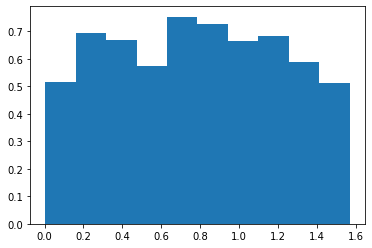

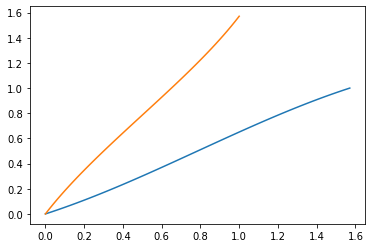

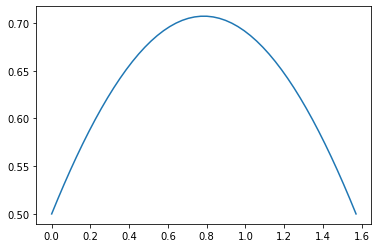

ValueError: x and y must have same first dimension, but have shapes (2000,) and (1000,)

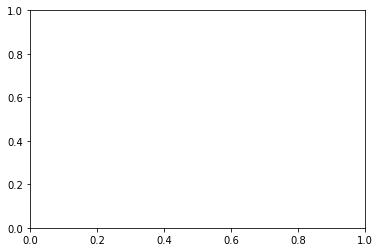

In [63]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

SQRT_2 = 2**(0.5)
SQRT_2_INV = 1 / SQRT_2

def f_x(x):
    return SQRT_2_INV*np.cos(x-np.pi/4)
def F_X(x):
    return SQRT_2_INV*(math.sin(x-np.pi/4) + SQRT_2_INV)
def get_x(R1):
    return math.asin(SQRT_2*R1 - SQRT_2_INV) + np.pi/4

def get_y(R2,x1):
    return np.arccos(np.cos(x1) - 2* f_x(x1)*R2) - x1

def vector_generator_2d():
    while True:
        R1 = random.random()
        R2 = random.random()
        x = get_x(R1)
        y = get_y(R2,x)
        yield (x,y)

vector_2d_generator = vector_generator_2d()

x_y_points = list()
for _ in range(1000):
    x_y_points.append(next(vector_2d_generator))


plt.hist([vector[0] for vector in x_y_points],density=True)
x_ls = np.linspace(0,np.pi/2)
_x = np.linspace(0,1)
plt.show()
plt.plot(x_ls,[F_X(x) for x in x_ls])
plt.plot(_x,[get_x(x) for x in _x])

plt.show()
plt.plot(x_ls,[f_x(x) for x in x_ls])

plt.plot()

plt.show()
plt.plot(range(2000),[vector[0] for vector in x_y_points],'o')
print(np.mean([vector[0] for vector in x_y_points]))
print(np.mean([vector[1] for vector in x_y_points]))

    

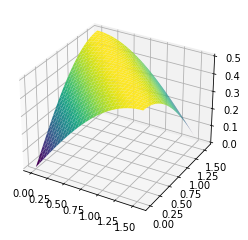

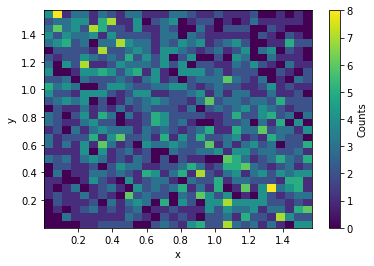

In [61]:
'''
fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = [1/2]
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()
'''

x = np.linspace(0, np.pi/2, 30)
y = np.linspace(0, np.pi/2, 30)

X, Y = np.meshgrid(x, y)
Z = 0.5*np.sin(X + Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
plt.show()

fig2 = plt.figure()
N,x_bins,y_bins,_ = plt.hist2d([vector[0] for vector in x_y_points], [vector[1] for vector in x_y_points],bins=30)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.show()


Теоретические значения СВ:
M(X):
$$
    M(x) = \int_0^(\pi/2) f(x) = \pi/4
    D(x) = M[X^2] -(M[X])^2 = \pi^2/(4*\sqrt(2)) + \pi/\sqrt(2) - 4/\sqrt(2) - \pi^2/16 = 1.137 + 0.61685027506 = 1.795
    cov(x,y) = \int_0^(\pi/4) dx \int_0^(\pi/4) ((((x - pi/4)*(y - pi/4))/2)*sin(x + y), (y, 0, pi/2), (x, 0, pi/2)) = -0.0460539482731883
    corr = -0.02565679569536953
$$